###ELO Calculator and Leaderboard###
####Shawn Zhao####

####These are core functions ####

In [1]:
AllSammys = []

In [2]:
import numpy as np
import pickle
import datetime
from numpy import pi, sqrt, linspace

In [3]:
class Sammy:
    """ The class Sammy will contain the information about each player, containing the following attributes: 
    
    Attributes: 
        Name: A string representing the Sammy's name. This is the only input, and must be a string.
        Password: A password to be entered by each player so no false games can be recorded. Defaults to string "password".
        ELO: A list containing their ELO scores. Everyone starts at 1500
        Sinks: A list containing the number of sinks per game
        Score: A list containing the score of each game
        Opponent Name: A list of names to ensure no false names are created to inflate or deflate ELOs. 
        Opponent Rank: A list containing the ELO of the opponent of each game
    """
    def __init__(self, name):
        self.name = name
        self.password = 'password'
        self.ELO = [1500]
        self.sinks = []
        self.score = []
        self.oppname = []
        self.opprank = []
        self.date = [str(datetime.date.today())]

ELO is calculated as a function of the ratings of both players and the actual score. The new ranking is given by the following equation following each match: 

$$R'_{A} = R_{A} + K (S_{A} - E_{A}) $$ where $R'_{A}$ is the new ELO ranking, $R_{A}$ is the old ELO ranking, $K$ is the impact factor of the game, $S_{A}$ is the reflective of the actual score of the game, and $E_{A}$ is reflective of the expected score of the game. 

The factor $K$ allows us to modify how important each game is. In our formula, we will have three graduated levels of K factors representing high, medium, and low impacts corresponding to tournment, ranked, and casual games. As some may know, the non-linear logistic map tends to chaos with the factor $K$, with low values of $K$ giving a converging factor, while higher $K$ values leading to either bifurcartion or chaos. A factor of 100 is defaulted, but for higher stakes games it can be tuned higher. 

The $E_{A}$ factor is given by the logistic curve $$E_{A} = \frac{1}{1  + 10 ^{R_{B} - R_{A}/400}}$$ where player A has a rating $R_{A}$ and player B has a rating $R_{B}$. To understand this equation better, let's imagine both players have the same rating: 

$$ R_{A} = R_{B} \\
E_{A} = \frac{1}{1  + 10 ^{0}} = \frac{1}{2} $$

This shows that each player has an expected score of 1/2, giving them an equal chance to win. Similarly, we can see that when $R_{B} > R_{A}$, $E_{A} < \frac{1}{2}$, while noting that $E_{A} + E_{B} = 1$. 

Thus, we need a scheme to normalize our BP game scores so that $S_{A} + S_{B} = 1$ as well.

One sink is worth three points points, so that if someone scores 21 points and 3 sinks, their total for the game is 30. Normalizing, to the total number of points, scores will be assigned so that $$S_{A} = \frac{3sinks_{A} + points_{A}}{3sinks_{A} + points_{A} + 3sinks_{B} + points_{B}}$$ 

so that

$$S_{A} + S_{B} = \frac{3  sinks_{A} + points_{A}}{3  sinks_{A} + points_{A} + 3 sinks_{B} + points_{B}} + \frac{3  sinks_{B} + points_{B}}{3 sinks_{A} + points_{A} + 3 sinks_{B} + points_{B}} = 1$$

This function also saves the game to the player file after each match automatically. 

In [4]:
""" 
The function ELO takes instances of class Sammy along with the score of the game and updates the instance's attributes. 
"""

def ELO(player1, player2, score1, score2, sink1, sink2,k=100):
    player1.opprank.append(player2.ELO[-1])
    player2.opprank.append(player1.ELO[-1])
    player1.oppname.append(player2.name)
    player2.oppname.append(player1.name)
    total1 = float((score1) + (3 * sink1))
    total2 = float((score2) + (3 * sink2))
    #ntotal is normalized total
    ntotal1 = total1 / (total1 + total2)
    ntotal2 = total2 / (total1 + total2)
    print(ntotal1)
    escore1 = (1 + 10**((player2.ELO[-1] - player1.ELO[-1])/400))**-1
    escore2 = (1 + 10**((player1.ELO[-1] - player2.ELO[-1])/400))**-1
    print(escore1)
    diff1 =  k*(ntotal1-escore1)
    diff2 =  k*(ntotal2-escore2)
    player1.ELO.append(player1.ELO[-1]+diff1)
    player2.ELO.append(player2.ELO[-1]+diff2)
    player1.sinks.append(sink1)
    player2.sinks.append(sink2)
    player1.score.append(score1)
    player2.score.append(score2)
    player1.date.append(str(datetime.date.today()))
    player2.date.append(str(datetime.date.today()))
    
    #saves the updated players to PKL file    
    output1 = open(player1.name + '.pkl','wb')
    pickle.dump(player1, output1)
    output2 = open(player2.name + '.pkl','wb')
    pickle.dump(player2, output2)

Username creation and password management

In [6]:
"""
This input allows for users to be created. The first and last names should be entered with a space seperating the two.
Each time a Sammy is added, the AllSammy master is updated as well.
"""
import pickle
name = raw_input('Enter the first and last name of the player: ')
exec("%s = Sammy(name)" % (name.replace(" ","")))
AllSammys.append(name)
output = open('AllSammys' + '.pkl', 'wb')
pickle.dump(AllSammys, output)

Enter the first and last name of the player: Kevin Weigand


In [99]:
"""
Allows player to change their password from default 'password' and then updates player file. Must be entered as a string.
"""

def passchange(player, password, oldpass):
    if oldpass == player.password:
        player.password = password
        output = open(player.name + '.pkl','wb')
        pickle.dump(player, output)
        print('Password successfully changed')
    else:
        print('Please enter correct password')

In [101]:
passchange(ShawnZhao, 'Keepyourword1','Keepyourword1')

Password successfully changed


#### Loads Instances Again ####

In [17]:
"""
Loads list of AllSammys
"""
import pickle
pkl_file = open('AllSammys.pkl', 'rb')
AllSammys = pickle.load(pkl_file)

In [18]:
"""
Loads all instances of AllSammys
"""
import pickle
for i in linspace(0,len(AllSammys)-1,len(AllSammys)):
    pkl_file = open(AllSammys[int(i)] + '.pkl','rb')
    exec("%s = pickle.load(pkl_file)" % (AllSammys[int(i)].replace(" ","")))

#### Plot of ELO over time####

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [13]:
"""
Given a specific player, this will plot ELO over the number of games played
"""
def plotplayer(Player):
    x = linspace(0, len(Player.ELO) -1, len(Player.ELO))
    y = Player.ELO
    
    plt.plot(x,y)
    
    plt.xlabel('Games Played')
    plt.ylabel('ELO')
    plt.title(Player.name + '\'s ELO')
    plt.grid(True)
    plt.show()

In [10]:
ELO(ShawnZhao,KevinWeigand,21,23,4,5)

0.464788732394
0.477520382093


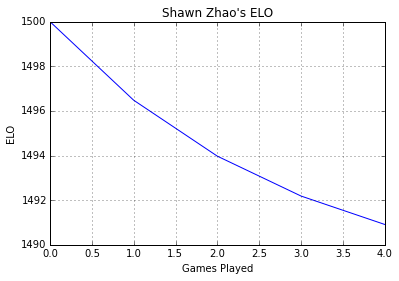

In [14]:
plotplayer(ShawnZhao)